In [1]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Radford_DDX3X_survivalAssessmentAssay"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name
assert dataset_path.exists()

In [2]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [13]:
scoreset = read_scoreset(dataset_path / "scoreset.csv")
scoreset = scoreset.assign(CHROM=scoreset.CHROM.astype(str),
                           POSITION=scoreset.POSITION.astype(str),
                           REF=scoreset.REF.astype(str),
                           ALT=scoreset.ALT.astype(str)).set_index(["CHROM", "POSITION", "REF", "ALT"])

In [14]:
scoreset

SGE_oligo_name  \
CHROM POSITION REF ALT                                                      
X     41334256 A   C    DDX3XE1exonChangecodonposition41334256toCGTR00...   
                   T    DDX3XE1exonChangecodonposition41334256toTGTC04...   
                   G    DDX3XE1exonChangecodonposition41334256toGGTG01...   
               AGT AAC  DDX3XE1exonChangecodonposition41334256toAACN05...   
                   ACC  DDX3XE1exonChangecodonposition41334256toACCT03...   
...                                                                   ...   
      41344127 A   C    DDX3XE9exonChangecodonposition41344126toACAT02...   
                   G    DDX3XE9exonChangecodonposition41344126toAGAR02...   
                   T    DDX3XE9exonChangecodonposition41344126toATAI01...   
      41344128 A   C    DDX3XE9exonChangecodonposition41344126toAACN05...   
                   T    DDX3XE9exonChangecodonposition41344126toAATN04...   

                       Variant_design_type chrom ref_codon alt_codon ref_aa  \
CHROM POSITION REF ALT                                                        
X     41334256 A   C                   snv  chrX       AGT       CGT      S   
                   T                   snv  chrX       AGT       TGT      S   
                   G                   snv  chrX       AGT       GGT      S   
               AGT AAC               snvre  chrX       AGT       AAC      S   
                   ACC               snvre  chrX       AGT       ACC      S   
...                                    ...   ...       ...       ...    ...   
      41344127 A   C                   snv  chrX       AAA       ACA      K   
                   G                   snv  chrX       AAA       AGA      K   
                   T                   snv  chrX       AAA       ATA      K   
      41344128 A   C                   snv  chrX       AAA       AAC      K   
                   T                   snv  chrX       AAA       AAT      K   

                       alt_aa Amino_acids Primary_consequence  \
CHROM POSITION REF ALT                                          
X     41334256 A   C        R         S/R    missense_variant   
                   T        C         S/C    missense_variant   
                   G        G         S/G    missense_variant   
               AGT AAC      N         S/N    missense_variant   
                   ACC      T         S/T    missense_variant   
...                       ...         ...                 ...   
      41344127 A   C        T         K/T    missense_variant   
                   G        R         K/R    missense_variant   
                   T        I         K/I    missense_variant   
      41344128 A   C        N         K/N    missense_variant   
                   T        N         K/N    missense_variant   

                                                   Consequence  \
CHROM POSITION REF ALT                                           
X     41334256 A   C                          missense_variant   
                   T                          missense_variant   
                   G                          missense_variant   
               AGT AAC                        missense_variant   
                   ACC                        missense_variant   
...                                                        ...   
      41344127 A   C    missense_variant,splice_region_variant   
                   G    missense_variant,splice_region_variant   
                   T    missense_variant,splice_region_variant   
      41344128 A   C    missense_variant,splice_region_variant   
                   T    missense_variant,splice_region_variant   

                       Variant_category cDNA_position         CDS_position  \
CHROM POSITION REF ALT                                                       
X     41334256 A   C           missense            95                    4   
                   T           missense            95                    4   
            

In [15]:
if 'author_transcript' not in scoreset.columns or scoreset.author_transcript.isna().all():
    AUTHOR_TRANSCRIPT = gene_info.loc[metadata.loc[dataset_name],'MANE_RefSeq_nuc'].values[0].split(".")[0]
else:
    AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

In [16]:
scoreset

SGE_oligo_name  \
CHROM POSITION REF ALT                                                      
X     41334256 A   C    DDX3XE1exonChangecodonposition41334256toCGTR00...   
                   T    DDX3XE1exonChangecodonposition41334256toTGTC04...   
                   G    DDX3XE1exonChangecodonposition41334256toGGTG01...   
               AGT AAC  DDX3XE1exonChangecodonposition41334256toAACN05...   
                   ACC  DDX3XE1exonChangecodonposition41334256toACCT03...   
...                                                                   ...   
      41344127 A   C    DDX3XE9exonChangecodonposition41344126toACAT02...   
                   G    DDX3XE9exonChangecodonposition41344126toAGAR02...   
                   T    DDX3XE9exonChangecodonposition41344126toATAI01...   
      41344128 A   C    DDX3XE9exonChangecodonposition41344126toAACN05...   
                   T    DDX3XE9exonChangecodonposition41344126toAATN04...   

                       Variant_design_type chrom ref_codon alt_codon ref_aa  \
CHROM POSITION REF ALT                                                        
X     41334256 A   C                   snv  chrX       AGT       CGT      S   
                   T                   snv  chrX       AGT       TGT      S   
                   G                   snv  chrX       AGT       GGT      S   
               AGT AAC               snvre  chrX       AGT       AAC      S   
                   ACC               snvre  chrX       AGT       ACC      S   
...                                    ...   ...       ...       ...    ...   
      41344127 A   C                   snv  chrX       AAA       ACA      K   
                   G                   snv  chrX       AAA       AGA      K   
                   T                   snv  chrX       AAA       ATA      K   
      41344128 A   C                   snv  chrX       AAA       AAC      K   
                   T                   snv  chrX       AAA       AAT      K   

                       alt_aa Amino_acids Primary_consequence  \
CHROM POSITION REF ALT                                          
X     41334256 A   C        R         S/R    missense_variant   
                   T        C         S/C    missense_variant   
                   G        G         S/G    missense_variant   
               AGT AAC      N         S/N    missense_variant   
                   ACC      T         S/T    missense_variant   
...                       ...         ...                 ...   
      41344127 A   C        T         K/T    missense_variant   
                   G        R         K/R    missense_variant   
                   T        I         K/I    missense_variant   
      41344128 A   C        N         K/N    missense_variant   
                   T        N         K/N    missense_variant   

                                                   Consequence  \
CHROM POSITION REF ALT                                           
X     41334256 A   C                          missense_variant   
                   T                          missense_variant   
                   G                          missense_variant   
               AGT AAC                        missense_variant   
                   ACC                        missense_variant   
...                                                        ...   
      41344127 A   C    missense_variant,splice_region_variant   
                   G    missense_variant,splice_region_variant   
                   T    missense_variant,splice_region_variant   
      41344128 A   C    missense_variant,splice_region_variant   
                   T    missense_variant,splice_region_variant   

                       Variant_category cDNA_position         CDS_position  \
CHROM POSITION REF ALT                                                       
X     41334256 A   C           missense            95                    4   
                   T           missense            95                    4   
            

In [17]:
clinvar_nuc_summaries = clinvar_df[clinvar_df.index.isin(scoreset.index)].groupby(level=list(range(4)),).apply(mapping_utils.summarize_clinvar_group)

In [18]:
clinvar_nuc_summaries.index.rename(['CHROM',"POSITION",'REF','ALT'],inplace=True)

In [19]:
scoreset_w_clinvar = pd.merge(scoreset,clinvar_nuc_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

In [20]:
scoreset_w_clinvar.shape[0]

9315

In [21]:
scoreset_w_clinvar[scoreset_w_clinvar.num_p_lp > 0].shape

(87, 59)

In [22]:
scoreset_w_clinvar[scoreset_w_clinvar.num_b_lb > 0].shape

(86, 59)

# Add gnomAD annotations

In [23]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [24]:
scoreset[scoreset.index.isin(gnomAD_df.index)].shape[0], scoreset.shape[0]

(235, 9315)

In [25]:
gnomAD_matches = gnomAD_df[(gnomAD_df.index.isin(scoreset.index)) & \
                            (gnomAD_df.Feature_base.isin(set(Ensembl_transcript_stable_ids).union(set((AUTHOR_TRANSCRIPT,)))))].sort_values(by='AC',ascending=False)

gnomAD_matches_unique = gnomAD_matches[~gnomAD_matches.index.duplicated(keep='first')]

In [26]:
gnomAD_matches_unique.index.rename(['CHROM',"POSITION",'REF','ALT'],inplace=True)

In [27]:
gnomAD_matches_unique.head()

ID  QUAL FILTER  AC        AF  \
CHROM POSITION REF ALT                                           
X     41347364 G   A    rs781633738 -10.0   PASS  61  0.000056   
      41347323 G   A    rs761434235 -10.0   PASS  47  0.000043   
      41347394 G   A    rs756197314 -10.0   PASS  42  0.000038   
      41347361 G   A    rs755359362 -10.0   PASS  34  0.000031   
      41341502 G   A    rs749047477 -10.0   PASS  33  0.000030   

                                                                      vep  \
CHROM POSITION REF ALT                                                      
X     41347364 G   A    A|missense_variant|MODERATE|DDX3X|ENSG00000215...   
      41347323 G   A    A|missense_variant|MODERATE|DDX3X|ENSG00000215...   
      41347394 G   A    A|missense_variant|MODERATE|DDX3X|ENSG00000215...   
      41347361 G   A    A|missense_variant|MODERATE|DDX3X|ENSG00000215...   
      41341502 G   A    A|missense_variant|MODERATE|DDX3X|ENSG00000215...   

                        index Allele       Consequence    IMPACT SYMBOL  \
CHROM POSITION REF ALT                                                    
X     41347364 G   A     5306      A  missense_variant  MODERATE  DDX3X   
      41347323 G   A     5293      A  missense_variant  MODERATE  DDX3X   
      41347394 G   A     5323      A  missense_variant  MODERATE  DDX3X   
      41347361 G   A     5304      A  missense_variant  MODERATE  DDX3X   
      41341502 G   A     2779      A  missense_variant  MODERATE  DDX3X   

                                   Gene Feature_type          Feature  \
CHROM POSITION REF ALT                                                  
X     41347364 G   A               1654   Transcript      NM_001356.5   
      41347323 G   A               1654   Transcript      NM_001356.5   
      41347394 G   A    ENSG00000215301   Transcript  ENST00000644876   
      41347361 G   A               1654   Transcript      NM_001356.5   
      41341502 G   A               1654   Transcript      NM_001356.5   

                               BIOTYPE   EXON  INTRON  \
CHROM POSITION REF ALT                                  
X     41347364 G   A    protein_coding  16/17     NaN   
      41347323 G   A    protein_coding  16/17     NaN   
      41347394 G   A    protein_coding  16/17     NaN   
      41347361 G   A    protein_coding  16/17     NaN   
      41341502 G   A    protein_coding   4/17     NaN   

                                              HGVSc  \
CHROM POSITION REF ALT                                
X     41347364 G   A          NM_001356.5:c.1822G>A   
      41347323 G   A          NM_001356.5:c.1781G>A   
      41347394 G   A    ENST00000644876.2:c.1852G>A   
      41347361 G   A          NM_001356.5:c.1819G>A   
      41341502 G   A           NM_001356.5:c.170G>A   

                                                HGVSp  cDNA_position  \
CHROM POSITION REF ALT                                                 
X     41347364 G   A          NP_001347.3:p.Ala608Thr           1913   
      41347323 G   A          NP_001347.3:p.Ser594Asn           1872   
      41347394 G   A    ENSP00000494040.1:p.Ala618Thr           1943   
      41347361 G   A          NP_001347.3:p.Gly607Ser           1910   
      41341502 G   A           NP_001347.3:p.Ser57Asn            261   

                        CDS_position  Protein_position Amino_acids   Codons  \
CHROM POSITION REF ALT                                                        
X     41347364 G   A            1822               608         A/T  Gcc/Acc   
      41347323 G   A            1781               594         S/N  aGt/aAt   
      41347394 G   A            1852               618         A/T  Gca/Aca   
      41347361 G   A            1819               607         G/S  Ggt/Agt   
      41341502 G   A             170                57         S/N  aGt/aAt   

                        ALLELE_NUM  DISTANCE  STRAND  FLAGS VARIANT_CLASS  \
CHROM POSITION REF ALT                                                

In [28]:
gnomAD_matches.shape, gnomAD_matches_unique.shape

((536, 56), (233, 56))

In [29]:
gnomAD_matches_unique.index.has_duplicates

False

In [30]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_matches_unique,
                                        left_index=True,right_index=True,how="left",validate="one_to_one")#.reset_index()

In [31]:
scoreset_processed.shape

(9315, 115)

In [32]:
scoreset_processed.to_csv(dataset_path / "scoreset_processed.csv",index=False)

# Reload Processed

In [30]:
scoreset_processed = pd.read_csv(dataset_path / "scoreset_processed.csv")

In [33]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.AF > 0 and r.spliceAI_scores <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5



In [34]:
INVERT_SCORES = False

sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
    'synonymous' : scoreset_processed[scoreset_processed.apply(is_synonymous,axis=1)],
}
sample_data = {k : v for k,v in sample_data.items() if len(v)}

if INVERT_SCORES:
    for k in sample_data:
        sample_data[k] = sample_data[k].assign(score= -sample_data[k].score)


In [35]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

P/LP: 84
B/LB: 86
gnomAD: 232
synonymous: 85


(<Figure size 1200x1200 with 4 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object))

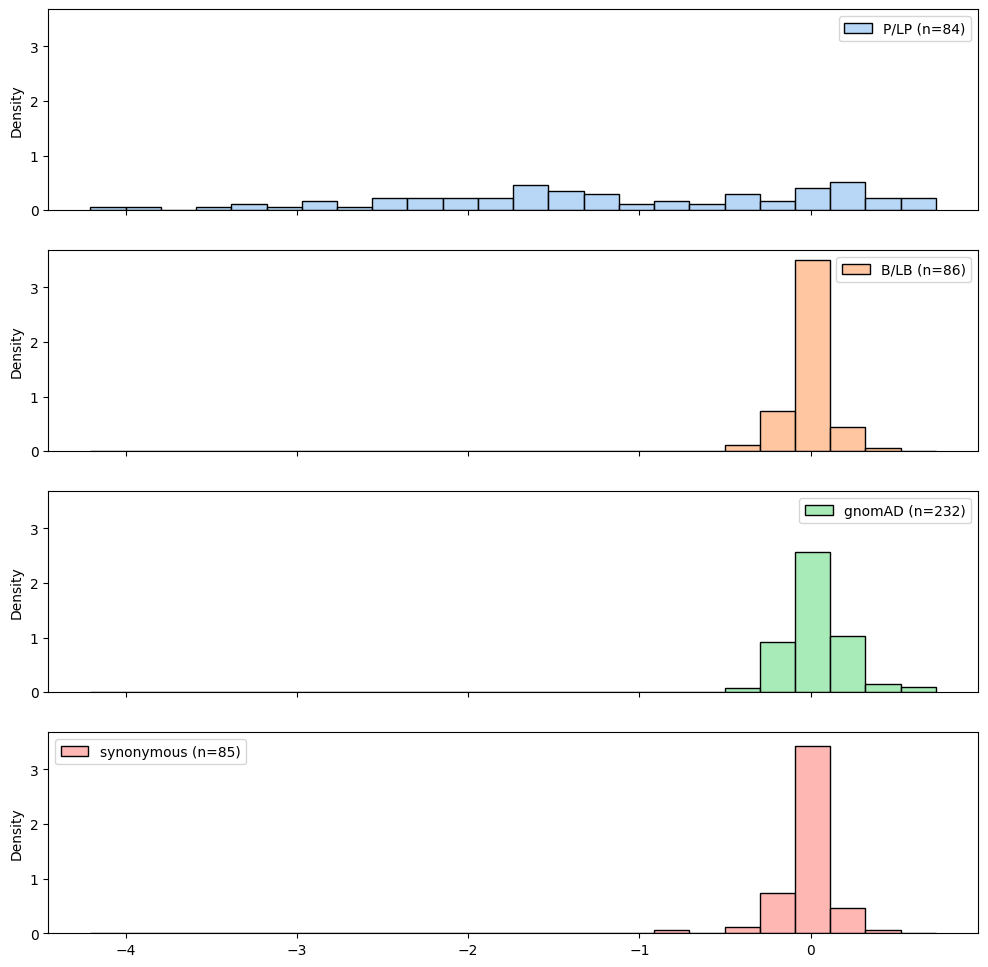

In [36]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [37]:
pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                            *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                            *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values],
                            *[dict(sample_name='synonymous',score=score) for score in sample_data['synonymous'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)